In [1]:
import requests
import numpy as np
import pandas as pd
import datetime
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import pandas_datareader.data as web
%matplotlib inline

In [2]:
load_dotenv('.env') 

fmp_key = os.getenv('FMP_API')

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

timeframe = "1D"

start_date = pd.Timestamp("2020-03-31", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-03-31", tz="America/New_York").isoformat()

type(fmp_key)

company = 'PFE'

In [3]:
inc_stmt = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{company}?apikey={fmp_key}').json()
bal_sht = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{company}?apikey={fmp_key}').json()
shares_outstanding = requests.get(f'https://financialmodelingprep.com/api/v3/enterprise-values/{company}?apikey={fmp_key}').json()

In [4]:
def inc_stmt_function():
    
    current_inc_stmt_df = pd.DataFrame.from_dict(inc_stmt[0], orient='index')
    current_inc_stmt_df = current_inc_stmt_df[6:27]
    current_inc_stmt_df.columns = ['CY']
    current_inc_stmt_df_rev = current_inc_stmt_df.loc['revenue']
    current_inc_stmt_df['Pct of Revenue'] = current_inc_stmt_df / current_inc_stmt_df_rev
    current_inc_stmt_df['PY-1'] = pd.DataFrame.from_dict(inc_stmt[1], orient='index')
    current_inc_stmt_df['PY-2'] = pd.DataFrame.from_dict(inc_stmt[2], orient='index')
    current_inc_stmt_df['PY-3'] = pd.DataFrame.from_dict(inc_stmt[3], orient='index')
    current_inc_stmt_df['PY-4'] = pd.DataFrame.from_dict(inc_stmt[4], orient='index')
   
    complete_inc_stmt_df = current_inc_stmt_df[['PY-4', 'PY-3', 'PY-2', 'PY-1', 'CY', 'Pct of Revenue']]
    
    avg_rev_growth = ((1+(inc_stmt[0]['revenue'] - inc_stmt[1]['revenue']) / inc_stmt[1]['revenue']) * (1+(inc_stmt[1]['revenue'] - inc_stmt[2]['revenue']) / inc_stmt[2]['revenue']) * (1+(inc_stmt[2]['revenue'] - inc_stmt[3]['revenue']) / inc_stmt[3]['revenue']) * (1+(inc_stmt[3]['revenue'] - inc_stmt[4]['revenue']) / inc_stmt[4]['revenue']))**(1/4) -1

    complete_inc_stmt_df['FY+1 est'] = (complete_inc_stmt_df['CY']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
    complete_inc_stmt_df['FY+2 est'] = (complete_inc_stmt_df['FY+1 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
    complete_inc_stmt_df['FY+3 est'] = (complete_inc_stmt_df['FY+2 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
    complete_inc_stmt_df['FY+4 est'] = (complete_inc_stmt_df['FY+3 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']
    complete_inc_stmt_df['FY+5 est'] = (complete_inc_stmt_df['FY+4 est']['revenue'] * (1+avg_rev_growth)) * complete_inc_stmt_df['Pct of Revenue']

    return complete_inc_stmt_df

inc_stmt_function()

C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,PY-4,PY-3,PY-2,PY-1,CY,Pct of Revenue,FY+1 est,FY+2 est,FY+3 est,FY+4 est,FY+5 est
revenue,52824000000,52546000000,53647000000,51750000000,41908000000,1,3.95515e+10,3.73276e+10,3.52287e+10,3.32478e+10,3.13783e+10
costOfRevenue,12329000000,11240000000,11248000000,10219000000,8692000000,0.207407,8.20325e+09,7.74199e+09,7.30666e+09,6.89581e+09,6.50806e+09
grossProfit,40495000000,41306000000,42399000000,41531000000,33216000000,0.792593,3.13483e+10,2.95856e+10,2.7922e+10,2.6352e+10,2.48702e+10
grossProfitRatio,0.766602,0.786092,0.790333,0.802531,0.792593,1.89127e-11,0.748026,0.705965,0.666269,0.628805,0.593448
researchAndDevelopmentExpenses,7872000000,7657000000,8006000000,8650000000,9405000000,0.22442,8.87616e+09,8.37706e+09,7.90602e+09,7.46147e+09,7.04192e+09
generalAndAdministrativeExpenses,14837000000,14784000000,14455000000,14350000000,11615000000,0.277155,1.09619e+10,1.03455e+10,9.76379e+09,9.21478e+09,8.69664e+09
sellingAndMarketingExpenses,0,0,0,0,0,0,0,0,0,0,0
otherExpenses,820000000,981000000,1628000000,1140000000,1825000000,0.0435478,1.72238e+09,1.62553e+09,1.53413e+09,1.44787e+09,1.36645e+09
operatingExpenses,26765000000,27199000000,27354000000,27610000000,24456000000,0.583564,2.30809e+10,2.1783e+10,2.05582e+10,1.94022e+10,1.83112e+10
costAndExpenses,39094000000,38439000000,38602000000,37829000000,33148000000,0.790971,3.12841e+10,2.9525e+10,2.78648e+10,2.6298e+10,2.48193e+10


In [5]:
def bal_sht_function():
    complete_inc_stmt_df = inc_stmt_function()    

    current_bal_sht_df = pd.DataFrame.from_dict(bal_sht[0],orient='index')
    current_bal_sht_df = current_bal_sht_df[6:-2]
    current_bal_sht_df.columns = ['CY']
    current_bal_sht_df['Pct of Revenue'] = current_bal_sht_df / complete_inc_stmt_df['CY'].iloc[0]
    current_bal_sht_df['PY-1'] = pd.DataFrame.from_dict(bal_sht[1],orient='index')
    current_bal_sht_df['PY-2'] = pd.DataFrame.from_dict(bal_sht[2],orient='index')
    current_bal_sht_df['PY-3'] = pd.DataFrame.from_dict(bal_sht[3],orient='index')
    current_bal_sht_df['PY-4'] = pd.DataFrame.from_dict(bal_sht[4],orient='index')
    complete_bal_sht_df = current_bal_sht_df[['PY-4', 'PY-3', 'PY-2', 'PY-1', 'CY', 'Pct of Revenue']]

    complete_bal_sht_df['FY+1 est'] = complete_inc_stmt_df['FY+1 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
    complete_bal_sht_df['FY+2 est'] = complete_inc_stmt_df['FY+2 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
    complete_bal_sht_df['FY+3 est'] = complete_inc_stmt_df['FY+3 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
    complete_bal_sht_df['FY+4 est'] = complete_inc_stmt_df['FY+4 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']
    complete_bal_sht_df['FY+5 est'] = complete_inc_stmt_df['FY+5 est']['revenue'] * complete_bal_sht_df['Pct of Revenue']


    return complete_bal_sht_df
    
bal_sht_function()


C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,PY-4,PY-3,PY-2,PY-1,CY,Pct of Revenue,FY+1 est,FY+2 est,FY+3 est,FY+4 est,FY+5 est
cashAndCashEquivalents,2595000000,1342000000,1139000000,1305000000,1784000000,0.0425694,1.68369e+09,1.58901e+09,1.49966e+09,1.41534e+09,1.33576e+09
shortTermInvestments,15255000000,18650000000,17694000000,8525000000,10437000000,0.249046,9.85013e+09,9.29627e+09,8.77354e+09,8.28021e+09,7.81462e+09
cashAndShortTermInvestments,17850000000,19992000000,18833000000,9830000000,12221000000,0.291615,1.15338e+10,1.08853e+10,1.02732e+10,9.69555e+09,9.15037e+09
netReceivables,11266000000,11271000000,11399000000,12068000000,11194000000,0.267109,1.05646e+10,9.97053e+09,9.40989e+09,8.88078e+09,8.38142e+09
inventory,6783000000,7578000000,7508000000,8283000000,8046000000,0.191992,7.59358e+09,7.16659e+09,6.76362e+09,6.38331e+09,6.02438e+09
otherCurrentAssets,2249000000,2288000000,2461000000,2601000000,3439000000,0.0820607,3.24563e+09,3.06313e+09,2.89089e+09,2.72834e+09,2.57492e+09
totalCurrentAssets,38949000000,41141000000,49926000000,32803000000,35067000000,0.836761,3.30952e+10,3.12343e+10,2.9478e+10,2.78205e+10,2.62561e+10
propertyPlantEquipmentNet,13318000000,13865000000,13385000000,13967000000,13900000000,0.331679,1.31184e+10,1.23808e+10,1.16846e+10,1.10276e+10,1.04075e+10
goodwill,54449000000,55952000000,53411000000,58653000000,49577000000,1.183,4.67893e+10,4.41584e+10,4.16754e+10,3.9332e+10,3.71204e+10
intangibleAssets,52648000000,48740000000,35211000000,35369000000,28472000000,0.679393,2.6871e+10,2.53601e+10,2.39341e+10,2.25883e+10,2.13182e+10


In [6]:
complete_inc_stmt_df = inc_stmt_function()
complete_bal_sht_df = bal_sht_function()   

C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [7]:
def cash_flow_forecast():    
    projected_cf = {}

    projected_cf['FY+1 est'] = {}

    projected_cf['FY+1 est']['Net Income'] = complete_inc_stmt_df['FY+1 est']['netIncome']
    projected_cf['FY+1 est']['Depreciation & Amortization'] = complete_inc_stmt_df['FY+1 est']['depreciationAndAmortization']
    projected_cf['FY+1 est']['Change in Receivables'] = complete_bal_sht_df['CY']['netReceivables'] - complete_bal_sht_df['FY+1 est']['netReceivables']
    projected_cf['FY+1 est']['Change in Inventory'] = complete_bal_sht_df['CY']['inventory'] - complete_bal_sht_df['FY+1 est']['inventory']
    projected_cf['FY+1 est']['Change in Payables'] = complete_bal_sht_df['FY+1 est']['accountPayables'] - complete_bal_sht_df['CY']['accountPayables']
    projected_cf['FY+1 est']['Change in NWC'] = projected_cf['FY+1 est']['Change in Receivables'] + projected_cf['FY+1 est']['Change in Inventory'] + projected_cf['FY+1 est']['Change in Payables']
    projected_cf['FY+1 est']['OP CF'] = projected_cf['FY+1 est']['Net Income'] + projected_cf['FY+1 est']['Depreciation & Amortization'] + projected_cf['FY+1 est']['Change in NWC']
    projected_cf['FY+1 est']['CAPEX'] = complete_bal_sht_df['FY+1 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['CY']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['FY+1 est']['depreciationAndAmortization']
    projected_cf['FY+1 est']['Unlevered FCF'] = projected_cf['FY+1 est']['CAPEX'] + projected_cf['FY+1 est']['OP CF']
    ##projected_cf['FY+1 est']['Total Debt'] = -(complete_bal_sht_df['FY+1 est']['totalDebt'])
    ##projected_cf['FY+1 est']['Levered FCF'] = projected_cf['FY+1 est']['Unlevered FCF'] + projected_cf['FY+1 est']['Total Debt']

    projected_cf['FY+2 est'] = {}

    projected_cf['FY+2 est']['Net Income'] = complete_inc_stmt_df['FY+2 est']['netIncome']
    projected_cf['FY+2 est']['Depreciation & Amortization'] = complete_inc_stmt_df['FY+2 est']['depreciationAndAmortization']
    projected_cf['FY+2 est']['Change in Receivables'] = complete_bal_sht_df['FY+1 est']['netReceivables'] - complete_bal_sht_df['FY+2 est']['netReceivables']
    projected_cf['FY+2 est']['Change in Inventory'] = complete_bal_sht_df['FY+1 est']['inventory'] - complete_bal_sht_df['FY+2 est']['inventory']
    projected_cf['FY+2 est']['Change in Payables'] = complete_bal_sht_df['FY+2 est']['accountPayables'] - complete_bal_sht_df['FY+1 est']['accountPayables']
    projected_cf['FY+2 est']['Change in NWC'] = projected_cf['FY+2 est']['Change in Receivables'] + projected_cf['FY+2 est']['Change in Inventory'] + projected_cf['FY+2 est']['Change in Payables']
    projected_cf['FY+2 est']['OP CF'] = projected_cf['FY+2 est']['Net Income'] + projected_cf['FY+2 est']['Depreciation & Amortization'] + projected_cf['FY+2 est']['Change in NWC']
    projected_cf['FY+2 est']['CAPEX'] = complete_bal_sht_df['FY+2 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['FY+1 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['FY+2 est']['depreciationAndAmortization']
    projected_cf['FY+2 est']['Unlevered FCF'] = projected_cf['FY+2 est']['CAPEX'] + projected_cf['FY+2 est']['OP CF']
    ##projected_cf['FY+2 est']['Total Debt'] = -(complete_bal_sht_df['FY+2 est']['totalDebt'])
    ##projected_cf['FY+2 est']['Levered FCF'] = projected_cf['FY+2 est']['Unlevered FCF'] + projected_cf['FY+2 est']['Total Debt']

    projected_cf['FY+3 est'] = {}

    projected_cf['FY+3 est']['Net Income'] = complete_inc_stmt_df['FY+3 est']['netIncome']
    projected_cf['FY+3 est']['Depreciation & Amortization'] = complete_inc_stmt_df['FY+3 est']['depreciationAndAmortization']
    projected_cf['FY+3 est']['Change in Receivables'] = complete_bal_sht_df['FY+2 est']['netReceivables'] - complete_bal_sht_df['FY+3 est']['netReceivables']
    projected_cf['FY+3 est']['Change in Inventory'] = complete_bal_sht_df['FY+2 est']['inventory'] - complete_bal_sht_df['FY+3 est']['inventory']
    projected_cf['FY+3 est']['Change in Payables'] = complete_bal_sht_df['FY+3 est']['accountPayables'] - complete_bal_sht_df['FY+2 est']['accountPayables']
    projected_cf['FY+3 est']['Change in NWC'] = projected_cf['FY+3 est']['Change in Receivables'] + projected_cf['FY+3 est']['Change in Inventory'] + projected_cf['FY+3 est']['Change in Payables']
    projected_cf['FY+3 est']['OP CF'] = projected_cf['FY+3 est']['Net Income'] + projected_cf['FY+3 est']['Depreciation & Amortization'] + projected_cf['FY+3 est']['Change in NWC']
    projected_cf['FY+3 est']['CAPEX'] = complete_bal_sht_df['FY+3 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['FY+2 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['FY+3 est']['depreciationAndAmortization']
    projected_cf['FY+3 est']['Unlevered FCF'] = projected_cf['FY+3 est']['CAPEX'] + projected_cf['FY+3 est']['OP CF']
    ##projected_cf['FY+3 est']['Total Debt'] = -(complete_bal_sht_df['FY+3 est']['totalDebt'])
    ##projected_cf['FY+3 est']['Levered FCF'] = projected_cf['FY+3 est']['Unlevered FCF'] + projected_cf['FY+3 est']['Total Debt']


    projected_cf['FY+4 est'] = {}

    projected_cf['FY+4 est']['Net Income'] = complete_inc_stmt_df['FY+4 est']['netIncome']
    projected_cf['FY+4 est']['Depreciation & Amortization'] = complete_inc_stmt_df['FY+4 est']['depreciationAndAmortization']
    projected_cf['FY+4 est']['Change in Receivables'] = complete_bal_sht_df['FY+3 est']['netReceivables'] - complete_bal_sht_df['FY+4 est']['netReceivables']
    projected_cf['FY+4 est']['Change in Inventory'] = complete_bal_sht_df['FY+3 est']['inventory'] - complete_bal_sht_df['FY+4 est']['inventory']
    projected_cf['FY+4 est']['Change in Payables'] = complete_bal_sht_df['FY+4 est']['accountPayables'] - complete_bal_sht_df['FY+3 est']['accountPayables']
    projected_cf['FY+4 est']['Change in NWC'] = projected_cf['FY+4 est']['Change in Receivables'] + projected_cf['FY+4 est']['Change in Inventory'] + projected_cf['FY+4 est']['Change in Payables']
    projected_cf['FY+4 est']['OP CF'] = projected_cf['FY+4 est']['Net Income'] + projected_cf['FY+4 est']['Depreciation & Amortization'] + projected_cf['FY+4 est']['Change in NWC']
    projected_cf['FY+4 est']['CAPEX'] = complete_bal_sht_df['FY+4 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['FY+3 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['FY+4 est']['depreciationAndAmortization']
    projected_cf['FY+4 est']['Unlevered FCF'] = projected_cf['FY+4 est']['CAPEX'] + projected_cf['FY+4 est']['OP CF']
    ##projected_cf['FY+4 est']['Total Debt'] = -(complete_bal_sht_df['FY+4 est']['totalDebt'])
    ##projected_cf['FY+4 est']['Levered FCF'] = projected_cf['FY+4 est']['Unlevered FCF'] + projected_cf['FY+4 est']['Total Debt']


    projected_cf['FY+5 est'] = {}

    projected_cf['FY+5 est']['Net Income'] = complete_inc_stmt_df['FY+5 est']['netIncome']
    projected_cf['FY+5 est']['Depreciation & Amortization'] = complete_inc_stmt_df['FY+5 est']['depreciationAndAmortization']
    projected_cf['FY+5 est']['Change in Receivables'] = complete_bal_sht_df['FY+4 est']['netReceivables'] - complete_bal_sht_df['FY+5 est']['netReceivables']
    projected_cf['FY+5 est']['Change in Inventory'] = complete_bal_sht_df['FY+4 est']['inventory'] - complete_bal_sht_df['FY+5 est']['inventory']
    projected_cf['FY+5 est']['Change in Payables'] = complete_bal_sht_df['FY+5 est']['accountPayables'] - complete_bal_sht_df['FY+4 est']['accountPayables']
    projected_cf['FY+5 est']['Change in NWC'] = projected_cf['FY+5 est']['Change in Receivables'] + projected_cf['FY+5 est']['Change in Inventory'] + projected_cf['FY+5 est']['Change in Payables']
    projected_cf['FY+5 est']['OP CF'] = projected_cf['FY+5 est']['Net Income'] + projected_cf['FY+5 est']['Depreciation & Amortization'] + projected_cf['FY+5 est']['Change in NWC']
    projected_cf['FY+5 est']['CAPEX'] = complete_bal_sht_df['FY+5 est']['propertyPlantEquipmentNet'] - complete_bal_sht_df['FY+4 est']['propertyPlantEquipmentNet'] + complete_inc_stmt_df['FY+5 est']['depreciationAndAmortization']
    projected_cf['FY+5 est']['Unlevered FCF'] = projected_cf['FY+5 est']['CAPEX'] + projected_cf['FY+5 est']['OP CF']
    ##projected_cf['FY+5 est']['Total Debt'] = -(complete_bal_sht_df['FY+5 est']['totalDebt'])
    ##projected_cf['FY+5 est']['Levered FCF'] = projected_cf['FY+5 est']['Unlevered FCF'] + projected_cf['FY+5 est']['Total Debt']

    cf_forecast = pd.DataFrame.from_dict(projected_cf, orient='columns')
    pd.options.display.float_format = '{:,.0f}'.format
    cf_forecast = cf_forecast.reindex(['Net Income', 'Depreciation & Amortization', 'Change in Receivables','Change in Inventory', 'Change in Payables', 'Change in NWC', 'OP CF', 'CAPEX', 'Unlevered FCF'])

    return cf_forecast

cash_flow_forecast()


,FY+1 est,FY+2 est,FY+3 est,FY+4 est,FY+5 est
Net Income,"9,075,297,432","8,564,998,281","8,083,392,981","7,628,868,090","7,199,900,893"
Depreciation & Amortization,"3,242,795,546","3,060,454,877","2,888,367,126","2,725,955,778","2,572,676,733"
Change in Receivables,"629,432,670","594,040,005","560,637,451","529,113,106","499,361,357"
Change in Inventory,"452,422,303","426,982,837","402,973,819","380,314,816","358,929,916"
Change in Payables,"-242,292,779","-228,668,785","-215,810,861","-203,675,931","-192,223,342"
Change in NWC,"839,562,193","792,354,057","747,800,410","705,751,990","666,067,931"
OP CF,"13,157,655,171","12,417,807,215","11,719,560,516","11,060,575,858","10,438,645,557"
CAPEX,"2,461,205,935","2,322,813,634","2,192,203,058","2,068,936,645","1,952,601,438"
Unlevered FCF,"15,618,861,106","14,740,620,849","13,911,763,574","13,129,512,504","12,391,246,995"


In [8]:
ticker_data = api.get_barset(
    [company, 'SPY'],
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000
).df

start = datetime.datetime(2020, 3, 31)
end = datetime.datetime(2021, 3, 31)

Treasury = web.DataReader(['TB1YR'], 'fred', start, end)
pd.options.display.float_format = '{:,.2f}'.format

rfr = float(Treasury.iloc[-1])
rfr = rfr/100
rfr

0.0007000000000000001

In [9]:
def wacc():
    def beta_calc(): 
        ticker_data = api.get_barset(
            [company, 'SPY'],
            timeframe,
            start=start_date,
            end=end_date,
            limit=1000
        ).df

        ticker_data = ticker_data.drop(columns=['open','high','low','volume'],level=1)
        daily_returns = ticker_data.pct_change().dropna()
        covariance = daily_returns[company]['close'].cov(daily_returns['SPY']['close'])
        variance = daily_returns['SPY']['close'].var()
        beta = covariance / variance 
        
        return beta

    def cost_of_equity():
        ticker_data = api.get_barset(
            [company, 'SPY'],
            timeframe,
            start=start_date,
            end=end_date,
            limit=1000
        ).df

        ticker_data = ticker_data.drop(columns=['open','high','low','volume'],level=1)
        market_returns = ticker_data['SPY']['close'].pct_change().dropna().mean()*252

        beta = beta_calc()
        risk_prem = market_returns - rfr

        return rfr + (beta*risk_prem)

    def cost_of_debt():
        debt_interest_rate = complete_inc_stmt_df['CY']['interestExpense'] / complete_bal_sht_df['CY']['totalDebt']
        
        return debt_interest_rate
    
    kd = cost_of_debt()
    ke = cost_of_equity()
    debt_to_capital = complete_bal_sht_df['CY']['totalDebt'] / complete_bal_sht_df['CY']['totalLiabilitiesAndStockholdersEquity']
    equity_to_capital = complete_bal_sht_df['CY']['totalStockholdersEquity'] / complete_bal_sht_df['CY']['totalLiabilitiesAndStockholdersEquity']
    tax_rate = 0.21

    return (kd * debt_to_capital * (1-tax_rate)) +(ke * equity_to_capital)

wacc()

0.11220728628985484

In [10]:
def dcf_px():
    FCF = cash_flow_forecast().iloc[-1]
    FCF_list = FCF.values.tolist()
    wacc_rate = wacc()
    npv = np.npv(wacc_rate,FCF_list).round(2)

    terminal_growth = 0.04
    terminal_value = FCF[-1] * (1+terminal_growth)/(wacc_rate-terminal_growth)
    terminal_value.round(2)

    shares = shares_outstanding [0]['numberOfShares']

    est_equity_value = terminal_value + npv

    ev_per_share = est_equity_value / shares
    return ev_per_share

dcf_px()

42.41981397479673

In [11]:
##def beta_calc(): 
    ##ticker_data = api.get_barset([company, 'SPY'],timeframe,start=start_date,end=end_date, limit=1000).df

    ##ticker_data = ticker_data.drop(columns=['open','high','low','volume'],level=1)
    ##daily_returns = ticker_data.pct_change().dropna()
    ##covariance = daily_returns[company]['close'].cov(daily_returns['SPY']['close'])
    ##variance = daily_returns['SPY']['close'].var()
    ##beta = covariance / variance 
    ##return beta

##beta_calc()

In [12]:
##def cost_of_equity():
    ##ticker_data = api.get_barset([company, 'SPY'], timeframe, start=start_date, end=end_date, limit=1000).df

    ##ticker_data = ticker_data.drop(columns=['open','high','low','volume'],level=1)
    ##market_returns = ticker_data['SPY']['close'].pct_change().dropna().mean()*252

    ##beta = beta_calc()
    ##risk_prem = market_returns - rfr

    ##return rfr + (beta*risk_prem)

##cost_of_equity()

In [13]:
##def cost_of_debt():
    ##debt_interest_rate = complete_inc_stmt_df['CY']['interestExpense'] / complete_bal_sht_df['CY']['totalDebt']
    ##return debt_interest_rate

##cost_of_debt()


In [14]:
##FCF = cash_flow_forecast().iloc[-1]
##FCF_list = FCF.values.tolist()
##wacc = wacc()
##npv = np.npv(wacc,FCF_list).round(2)
##npv 

In [15]:
##terminal_growth = 0.04
##terminal_value = FCF[-1] * (1+terminal_growth)/(wacc-terminal_growth)
##terminal_value.round(2)

In [16]:
def fundamental_analysis():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function() 
    
    financial_analysis = {}


    financial_analysis['Liquidity Ratios'] = {}


    financial_analysis['Liquidity Ratios']['Current Ratio'] = complete_bal_sht_df['CY']['totalCurrentAssets'] / complete_bal_sht_df['CY']['totalCurrentLiabilities']

    financial_analysis['Liquidity Ratios']['Quick Ratio'] = (complete_bal_sht_df['CY']['totalCurrentAssets'] - complete_bal_sht_df['CY']['inventory'] - complete_bal_sht_df['CY']['otherCurrentAssets'])/ complete_bal_sht_df['CY']['totalCurrentLiabilities']

    financial_analysis['Liquidity Ratios']['Cash Ratio'] = (complete_bal_sht_df['CY']['totalCurrentAssets'] - complete_bal_sht_df['CY']['inventory'] - complete_bal_sht_df['CY']['netReceivables'] - complete_bal_sht_df['CY']['otherCurrentAssets']) / complete_bal_sht_df['CY']['totalCurrentLiabilities']


    financial_analysis['Solvency Ratios'] = {}


    financial_analysis['Solvency Ratios']['Debt-Equity'] = complete_bal_sht_df['CY']['totalLiabilities'] / complete_bal_sht_df['CY']['totalStockholdersEquity']

    financial_analysis['Solvency Ratios']['Debt-Capital'] = complete_bal_sht_df['CY']['totalLiabilities'] / complete_bal_sht_df['CY']['totalLiabilitiesAndStockholdersEquity']


    financial_analysis['Profitability Ratios'] = {}


    financial_analysis['Profitability Ratios']['Profit Margin'] = complete_inc_stmt_df['CY']['netIncome'] / complete_inc_stmt_df['CY']['revenue']

    financial_analysis['Profitability Ratios']['Operating Margin'] = complete_inc_stmt_df['CY']['operatingIncomeRatio']

    financial_analysis['Profitability Ratios']['Gross Margin'] = complete_inc_stmt_df['CY']['grossProfitRatio']

    financial_analysis['Profitability Ratios']['ROA'] = complete_inc_stmt_df['CY']['netIncome'] / complete_bal_sht_df['CY']['totalAssets']

    financial_analysis['Profitability Ratios']['ROE'] = complete_inc_stmt_df['CY']['netIncome'] / complete_bal_sht_df['CY']['totalStockholdersEquity']


    financial_analysis['Debt Coverage Ratios'] = {}


    financial_analysis['Debt Coverage Ratios']['Interest Coverage'] = complete_inc_stmt_df['CY']['incomeBeforeTax'] / complete_inc_stmt_df['CY']['interestExpense']

    financial_analysis['Debt Coverage Ratios']['Debt Service Coverage'] =complete_inc_stmt_df['CY']['incomeBeforeTax'] / complete_bal_sht_df['CY']['totalLiabilities']

    financial_analysis['Debt Coverage Ratios']['Asset Coverage'] =  (complete_bal_sht_df['CY']['totalAssets'] - complete_bal_sht_df['CY']['totalCurrentLiabilities'])/ complete_bal_sht_df['CY']['totalCurrentLiabilities']

    financial_analysis_df = pd.DataFrame.from_dict(financial_analysis, orient='columns')
    pd.options.display.float_format = '{:,.2f}'.format
    financial_analysis_df = financial_analysis_df.reindex(['Current Ratio', 'Quick Ratio', 'Cash Ratio','Debt-Equity', 'Debt-Capital', 'Profit Margin', 'Operating Margin', 'Gross Margin', 'ROA', 'ROE', 'Asset Coverage', 'Interest Coverage', 'Debt Service Coverage'])

    

    return financial_analysis_df

fundamental_analysis()

C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,Liquidity Ratios,Solvency Ratios,Profitability Ratios,Debt Coverage Ratios
Current Ratio,1.35,nan,nan,nan
Quick Ratio,0.91,nan,nan,nan
Cash Ratio,0.48,nan,nan,nan
Debt-Equity,nan,1.44,nan,nan
Debt-Capital,nan,0.59,nan,nan
Profit Margin,nan,nan,0.23,nan
Operating Margin,nan,nan,0.21,nan
Gross Margin,nan,nan,0.79,nan
ROA,nan,nan,0.06,nan
ROE,nan,nan,0.15,nan


In [17]:
def liquidity_analysis():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function() 
    financial_analysis_df = fundamental_analysis()

    liquidity_ratio = financial_analysis_df['Liquidity Ratios'].dropna()
    
    return liquidity_ratio

liquidity_analysis()


C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Current Ratio   1.35
Quick Ratio     0.91
Cash Ratio      0.48
Name: Liquidity Ratios, dtype: float64

In [18]:
def solvency_analysis():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function() 
    financial_analysis_df = fundamental_analysis()
    
    solvency_ratio = financial_analysis_df['Solvency Ratios'].dropna()

    return solvency_ratio

solvency_analysis()


C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Debt-Equity    1.44
Debt-Capital   0.59
Name: Solvency Ratios, dtype: float64

In [19]:
def profitability_analysis():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function() 
    financial_analysis_df = fundamental_analysis()

    profitability_ratio = financial_analysis_df['Profitability Ratios'].dropna()

    return profitability_ratio

profitability_analysis()

C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Profit Margin      0.23
Operating Margin   0.21
Gross Margin       0.79
ROA                0.06
ROE                0.15
Name: Profitability Ratios, dtype: float64

In [20]:
def debt_coverage_analysis():
    complete_inc_stmt_df = inc_stmt_function()
    complete_bal_sht_df = bal_sht_function() 
    financial_analysis_df = fundamental_analysis()

    debt_coverage_ratio = financial_analysis_df['Debt Coverage Ratios'].dropna()

    return debt_coverage_ratio

debt_coverage_analysis()

C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\andyl\anaconda3\envs\alpacaenv\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

Asset Coverage          4.95
Interest Coverage       5.17
Debt Service Coverage   0.08
Name: Debt Coverage Ratios, dtype: float64

In [21]:
ine = 

SyntaxError: invalid syntax (<ipython-input-21-9ab2b822e242>, line 1)

In [ ]:
ticker_data = api.get_barset(
        company,
        timeframe,
        start=start_date,
        end=end_date,
        limit=1000
    ).df

num_sims = 1000

MC = MCSimulation(
    portfolio_data = ticker_data,
    weights= [1],
    num_simulation = num_sims,
    num_trading_days = 252*5    
)

pd.options.display.float_format = '{:,.6f}'.format

MC.portfolio_data.tail()

PFE                                          \
                               open      high       low     close    volume   
time                                                                          
2021-03-25 00:00:00-04:00 35.650000 35.790000 35.250000 35.675000  19653224   
2021-03-26 00:00:00-04:00 35.680000 36.290000 35.640000 36.240000  19785715   
2021-03-29 00:00:00-04:00 36.000000 36.740000 35.900000 36.600000  22918393   
2021-03-30 00:00:00-04:00 36.590000 36.630000 36.020000 36.120000  23111103   
2021-03-31 00:00:00-04:00 36.110000 36.430000 36.043300 36.230000  19859271   

                                        
                          daily_return  
time                                    
2021-03-25 00:00:00-04:00     0.001685  
2021-03-26 00:00:00-04:00     0.015837  
2021-03-29 00:00:00-04:00     0.009934  
2021-03-30 00:00:00-04:00    -0.013115  
2021-03-31 00:00:00-04:00     0.003045

In [ ]:
pd.options.display.float_format = '{:,.6f}'.format

MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989300,0.966091,0.973903,0.993167,0.991571,1.023715,1.014158,1.000823,1.015960,0.995817,...,1.006187,1.003953,0.976000,1.013033,0.960562,1.038613,1.009274,1.018926,0.988828,1.030129
2,0.992610,0.974150,0.967319,1.003259,0.992926,1.019229,1.010645,0.950726,1.042967,0.979838,...,1.010941,0.983769,0.980610,0.984156,0.922424,1.071379,0.980119,1.039032,0.996596,1.050143
3,0.985882,0.954108,0.964923,1.035875,1.004260,1.020350,0.996514,0.944239,1.030518,0.977554,...,1.029513,0.972930,0.981480,0.970734,0.931966,1.087344,0.974388,1.030179,0.985094,1.058093
4,0.993661,0.973383,0.955745,1.042071,0.982973,1.011368,1.001635,0.949762,1.002784,0.987643,...,1.024170,0.970431,0.969845,0.986314,0.935379,1.084811,0.959811,1.008789,0.993864,1.058402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.172552,5.010839,3.227692,0.723736,0.978694,4.253178,2.638347,1.988755,4.422334,2.370852,...,2.589260,1.987738,1.333868,1.990581,2.345570,1.268058,2.894059,1.006615,2.236041,3.430619
1257,1.173766,4.848688,3.254906,0.706345,1.007116,4.150650,2.600727,2.065026,4.459642,2.325140,...,2.682996,1.973986,1.324412,2.056066,2.380472,1.283902,2.914815,1.026761,2.258397,3.434822
1258,1.204386,4.793775,3.250582,0.711837,0.989327,4.222918,2.658644,2.074729,4.539567,2.359381,...,2.716028,1.972920,1.334593,2.064158,2.409179,1.283897,2.921916,1.012702,2.260398,3.438277
1259,1.183928,4.887167,3.303990,0.691966,1.007205,4.170228,2.678484,2.102697,4.466451,2.404050,...,2.734337,1.934140,1.356256,2.098589,2.407199,1.280566,2.900097,1.014633,2.258270,3.370684


,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.000985,1.001235,0.944192,1.063317
2,1.000557,0.999612,0.920871,1.086384
3,1.000321,0.998861,0.909145,1.109068
4,1.001174,1.000977,0.882475,1.148644


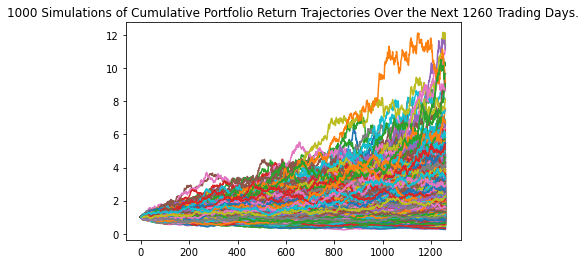

In [ ]:
plot = MC.plot_simulation()

simulated_returns_data = {
    'mean': list(MC.simulated_return.mean(axis=1)),
    'median': list(MC.simulated_return.median(axis=1)),
    'min': list(MC.simulated_return.min(axis=1)),
    'max': list(MC.simulated_return.max(axis=1)),
}


pd.options.display.float_format = '{:,.6f}'.format
df_simulated_returns = pd.DataFrame(simulated_returns_data)
df_simulated_returns.head()

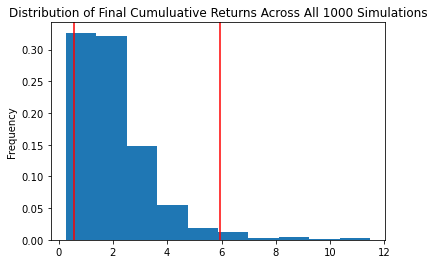

In [ ]:
dist_plot = MC.plot_distribution()